# Self-Organizing Map (SOM)


## Problem Statement


Implement **Self-Organizing Map (SOM)** on **Iris dataset**.


### Import Libraries


In [1]:
import numpy as np
import pandas as pd
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

### Load Dataset


In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
species_map = {i: name for i, name in enumerate(iris.target_names)}
df["species"] = [species_map[label] for label in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data = iris.data[:, :2]
labels = iris.target

### Scale the features


In [4]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

### Creating SOM


In [5]:
som_size = (5, 5)
som = MiniSom(som_size[0], som_size[1], 2, sigma=1.0, learning_rate=0.5, random_seed=42)
som.train_random(data, 500)

In [6]:
win_map = np.array([som.winner(x) for x in data])

### Visualize SOM


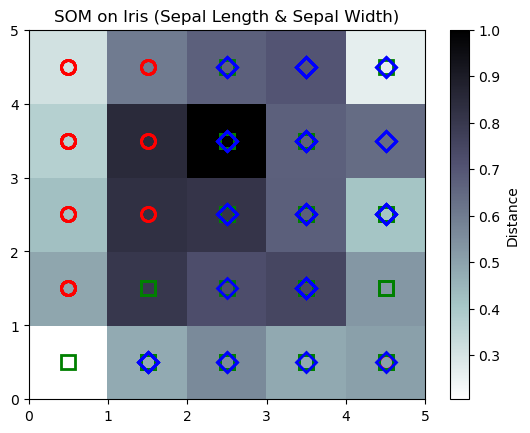

In [7]:
plt.pcolor(som.distance_map().T, cmap="bone_r")
plt.colorbar(label="Distance")

markers = ["o", "s", "D"]
colors = ["r", "g", "b"]

for i, x in enumerate(data):
    w = som.winner(x)
    plt.plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[labels[i]],
        markerfacecolor="None",
        markeredgecolor=colors[labels[i]],
        markersize=10,
        markeredgewidth=2,
    )

plt.title("SOM on Iris (Sepal Length & Sepal Width)")
plt.show()